# Submission 2 - Recommendation System

**Nama : Muhammad Daffa Eka Pramudita**
**<br>Email : mdaffa.ekapram@gmail.com**
**<br>ID Dicoding : dabrut**

# Project Overview

Industri anime Jepang merupakan salah satu sektor hiburan global yang mengalami pertumbuhan pesat, dengan jumlah judul anime yang terus bertambah setiap tahunnya. Platform seperti [MyAnimeList](https://myanimelist.net/) menyediakan katalog besar yang mencakup ribuan judul anime beserta informasi pendukung seperti genre, studio, skor pengguna, dan popularitas. Namun, banyaknya pilihan sering kali membuat pengguna kesulitan menemukan anime yang sesuai dengan preferensi mereka. Oleh karena itu, pengembangan **sistem rekomendasi anime yang efektif** menjadi sangat penting untuk meningkatkan pengalaman pengguna.

Selain itu, pemahaman terhadap **genre yang paling populer** serta **faktor-faktor yang memengaruhi popularitas** dapat memberikan wawasan berharga bagi studio dan produser anime dalam merancang konten yang lebih relevan dengan minat pasar.

### Mengapa Masalah Ini Penting untuk Diselesaikan

- Pengguna membutuhkan bantuan dalam menavigasi ribuan pilihan anime.
- Rekomendasi yang relevan dapat meningkatkan retensi pengguna dan kepuasan menonton.
- Produser dapat menggunakan data genre dan popularitas untuk menyusun strategi produksi konten yang lebih tepat sasaran.

Menurut riset yang dilakukan oleh Kumar et al. (2020), sistem rekomendasi berbasis konten dan kolaboratif telah berhasil meningkatkan kepuasan pengguna pada platform hiburan seperti Netflix dan Spotify [1]. Sistem yang sama dapat diadaptasi untuk platform anime. Selain itu, penelitian dari Ismail et al. (2021) menyatakan bahwa genre, popularitas, dan demografi merupakan fitur penting dalam membangun sistem rekomendasi anime yang akurat [2].

Dengan memanfaatkan data dari MyAnimeList, proyek ini bertujuan untuk:
- Menganalisis genre anime yang paling populer berdasarkan data agregat pengguna.
- Membangun prototipe sistem rekomendasi menggunakan algoritma content-based dan collaborative filtering.



# Business Understanding

### **Problem Statement**



1.   Bagaimana cara membuat sistem rekomendasi anime yang baik dan relevan berdasarkan preferensi pengguna dan karakteristik anime?
2.   Apa genre anime yang paling populer di kalangan pengguna MyAnimeList?


### **Goals**



1.   Mengembangkan sistem rekomendasi anime yang dapat menyarankan anime relevan kepada pengguna berdasarkan minat mereka.
2.   Mengidentifikasi genre anime yang paling populer berdasarkan data seperti popularity rank, jumlah anggota (members), dan jumlah favorit (favorites).




### **Solution Statement**



1.   Menerapkan algoritma sistem rekomendasi seperti Content-Based Filtering yang berdasarkan pada kemiripan fitur anime seperti genre dan demographic
2.   Melakukan analisis eksploratif terhadap data MyAnimeList untuk menghitung dan membandingkan popularitas setiap genre.


# Data Understanding

## Import Library

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## Data Loading

In [39]:
#!/bin/bash
!curl -L -o anime-database-2022.zip\
  "https://www.kaggle.com/api/v1/datasets/download/harits/anime-database-2022"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 5436k  100 5436k    0     0  12.3M      0 --:--:-- --:--:-- --:--:-- 12.3M


In [40]:
!unzip anime-database-2022.zip -d anime-database-2022

Archive:  anime-database-2022.zip
replace anime-database-2022/Anime.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: anime-database-2022/Anime.csv  


In [41]:
df = pd.read_csv('anime-database-2022/Anime.csv')

In [42]:
df.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

| Atribut           | Deskripsi                                                                 |
|-------------------|---------------------------------------------------------------------------|
| **ID**            | ID anime di MyAnimeList.net                                               |
| **Title**         | Judul asli dari anime                                                     |
| **Synonyms**      | Nama lain dari anime                                                      |
| **Japanese**      | Judul anime dalam bahasa Jepang                                           |
| **English**       | Judul anime dalam bahasa Inggris                                          |
| **Synopsis**      | Ringkasan cerita anime                                                    |
| **Type**          | Tipe anime (TV, Movie, OVA, dll)                                          |
| **Episodes**      | Jumlah episode dalam anime                                                |
| **Status**        | Status penayangan anime (belum tayang, sedang tayang, sudah selesai)      |
| **Start_Aired**   | Tanggal atau tahun mulai tayang                                           |
| **End_Aired**     | Tanggal atau tahun selesai tayang                                         |
| **Premiered**     | Musim tayang perdana (misalnya: Spring 2023)                              |
| **Broadcast**     | Jadwal siaran anime                                                       |
| **Producers**     | Daftar produser                                                           |
| **Licensors**     | Daftar pemegang lisensi distribusi                                        |
| **Studios**       | Studio yang memproduksi anime                                             |
| **Source**        | Sumber cerita anime (manga, novel, original, dll)                         |
| **Genres**        | Daftar genre anime (aksi, drama, komedi, dll)                             |
| **Themes**        | Tema-tema yang diangkat dalam anime                                       |
| **Demographics**  | Sasaran demografis (shounen, seinen, josei, dll)                          |
| **Duration_Minutes** | Durasi tiap episode (dalam menit)                                      |
| **Rating**        | Kategori usia penonton (PG-13, R, dll)                                    |
| **Score**         | Skor rata-rata dari pengguna MyAnimeList.net                              |
| **Scored_Users**  | Jumlah pengguna yang memberikan skor                                      |
| **Ranked**        | Peringkat berdasarkan skor tertinggi                                      |
| **Popularity**    | Peringkat berdasarkan popularitas (jumlah yang menambahkan ke daftar)     |
| **Members**       | Jumlah pengguna yang menambahkan anime ke daftar mereka                   |
| **Favorites**     | Jumlah pengguna yang menandai anime sebagai favorit                       |


In [44]:
df.describe()

,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,21460.000000,20913.000000,20861.000000,14562.000000,14562.000000,19536.000000,21460.000000,2.146000e+04,21460.000000
mean,26458.575582,13.272892,23.934135,6.421724,26507.173809,97795.212019,10743.103681,3.926596e+04,462.214865
std,17100.477121,48.792326,24.676538,0.910469,84989.501599,56485.384273,6204.685188,1.566359e+05,4411.931536
min,1.000000,1.000000,1.000000,1.841000,101.000000,12.000000,1.000000,6.000000e+00,0.000000
25%,8454.750000,1.000000,5.000000,5.791000,418.000000,48879.500000,5369.750000,2.910000e+02,0.000000
50%,31004.500000,2.000000,22.000000,6.431000,1876.500000,97777.000000,10741.500000,1.582500e+03,2.000000
75%,40495.250000,12.000000,26.000000,7.081000,11406.500000,146714.500000,16119.250000,1.158550e+04,23.000000
max,53094.000000,3057.000000,168.000000,9.131000,997243.000000,195632.000000,21490.000000,3.524109e+06,207772.000000


## EDA

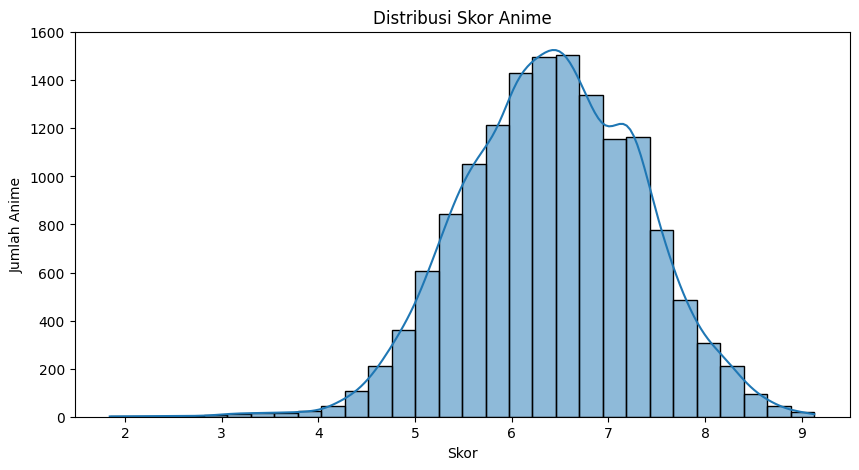

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Score'].dropna(), bins=30, kde=True)
plt.title("Distribusi Skor Anime")
plt.xlabel("Skor")
plt.ylabel("Jumlah Anime")
plt.show()

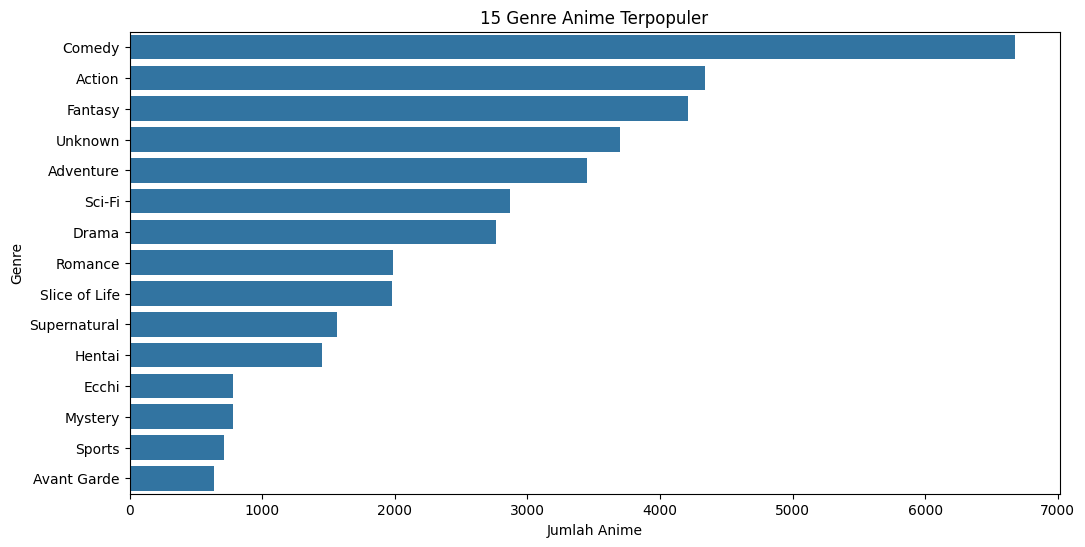

In [47]:
from collections import Counter

# Pisahkan genre yang dipisahkan koma
genre_lists = df['Genres'].dropna().apply(lambda x: x.split(', '))
flat_genres = [genre for sublist in genre_lists for genre in sublist]

# Hitung frekuensi
genre_counts = Counter(flat_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values("Count", ascending=False)

# Visualisasi genre terpopuler
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df.head(15), x="Count", y="Genre")
plt.title("15 Genre Anime Terpopuler")
plt.xlabel("Jumlah Anime")
plt.ylabel("Genre")
plt.show()

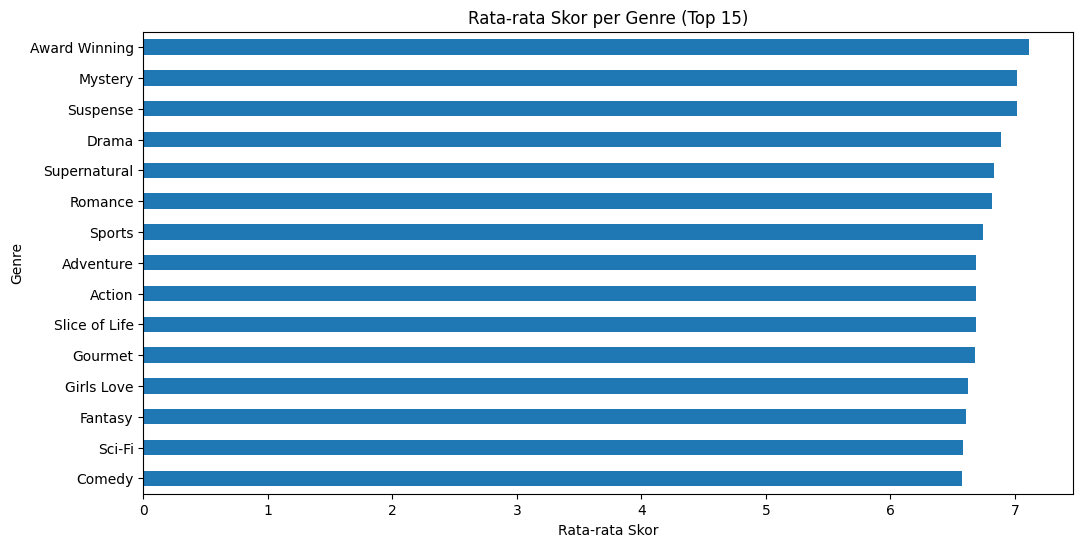

In [48]:
# Hanya data yang punya genre dan skor
df_genre_score = df[['Genres', 'Score']].dropna()

# Ekspansi genre menjadi baris terpisah
genre_scores = df_genre_score.assign(Genres=df_genre_score['Genres'].str.split(', ')).explode('Genres')

# Hitung rata-rata skor per genre
avg_score_per_genre = genre_scores.groupby('Genres')['Score'].mean().sort_values(ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(12, 6))
avg_score_per_genre.plot(kind='barh')
plt.title("Rata-rata Skor per Genre (Top 15)")
plt.xlabel("Rata-rata Skor")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()


# Data Preparation

In [49]:
df.drop(['Synonyms', 'Japanese','Episodes', 'Start_Aired',
         'End_Aired','Premiered', 'Broadcast','Producers', 'Licensors','Source',
         'Themes','Duration_Minutes','Scored_Users',
         'Ranked', 'Members', 'Favorites'],axis=1,inplace=True)

In [50]:
df.columns

Index(['ID', 'Title', 'English', 'Synopsis', 'Type', 'Status', 'Studios',
       'Genres', 'Demographics', 'Rating', 'Score', 'Popularity'],
      dtype='object')

In [51]:
df.isnull().sum()

,0
ID,0
Title,0
English,0
Synopsis,0
Type,0
Status,0
Studios,0
Genres,0
Demographics,0
Rating,545


In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
# Deteksi Outlier dengan metode IQR
def detect_outliers(data):
    outlier_summary = {}
    for column in data.select_dtypes(include=np.number).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

# Menjalankan fungsi untuk dataset (tanpa kolom target)
indicators_columns = df.drop(columns=['risk_score'], errors='ignore')
outlier_counts = detect_outliers(indicators_columns)

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Jumlah outlier per kolom:
ID: 0
Score: 81
Popularity: 0


IQR untuk kolom 'Score': 1.29
Batas bawah: 3.86
Batas atas : 9.02
Jumlah outlier pada kolom 'Score': 81


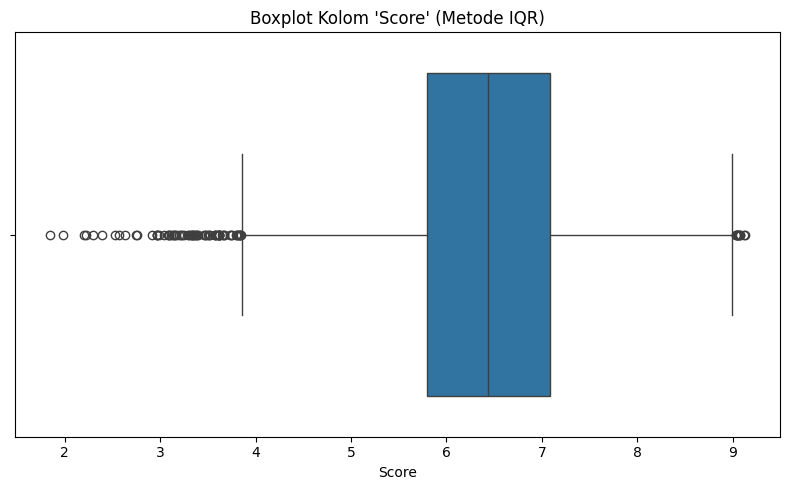

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col = 'Score'

# Hitung IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Tampilkan informasi
print(f"IQR untuk kolom '{col}': {IQR:.2f}")
print(f"Batas bawah: {lower_bound:.2f}")
print(f"Batas atas : {upper_bound:.2f}")
print(f"Jumlah outlier pada kolom '{col}': {len(outliers)}")

# Buat boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[col])
plt.title(f"Boxplot Kolom '{col}' (Metode IQR)")
plt.xlabel(col)
plt.tight_layout()
plt.show()


## Data Cleansing

In [54]:
df_clean = df.dropna()

In [55]:
df_clean.isnull().sum()

,0
ID,0
Title,0
English,0
Synopsis,0
Type,0
Status,0
Studios,0
Genres,0
Demographics,0
Rating,0


In [56]:
print(f"Jumlah baris sebelum data cleansing: {df.shape[0]}")
print(f"Jumlah baris sesudah data cleansing: {df_clean.shape[0]}")

Jumlah baris sebelum data cleansing: 21460
Jumlah baris sesudah data cleansing: 14465


In [57]:
df_clean.head(10)

,ID,Title,English,Synopsis,Type,Status,Studios,Genres,Demographics,Rating,Score,Popularity
0,16498,Shingeki no Kyojin,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,Finished Airing,Wit Studio,"Action, Drama",Shounen,R - 17+ (violence & profanity),8.531,1
1,1535,Death Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,Finished Airing,Madhouse,"Supernatural, Suspense",Shounen,R - 17+ (violence & profanity),8.621,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,Finished Airing,Bones,"Action, Adventure, Drama, Fantasy",Shounen,R - 17+ (violence & profanity),9.131,3
3,30276,One Punch Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,Finished Airing,Madhouse,"Action, Comedy",Seinen,R - 17+ (violence & profanity),8.511,4
4,11757,Sword Art Online,Sword Art Online,Ever since the release of the innovative Nerve...,TV,Finished Airing,A-1 Pictures,"Action, Adventure, Fantasy, Romance",Unknown,PG-13 - Teens 13 or older,7.201,5
5,31964,Boku no Hero Academia,My Hero Academia,"The appearance of ""quirks,"" newly discovered s...",TV,Finished Airing,Bones,Action,Shounen,PG-13 - Teens 13 or older,7.921,6
6,20,Naruto,Naruto,"Moments prior to Naruto Uzumaki's birth, a hug...",TV,Finished Airing,Pierrot,"Action, Adventure, Fantasy",Shounen,PG-13 - Teens 13 or older,7.971,7
7,22319,Tokyo Ghoul,Tokyo Ghoul,A sinister threat is invading Tokyo: flesh-eat...,TV,Finished Airing,Pierrot,"Action, Fantasy, Horror",Seinen,R - 17+ (violence & profanity),7.791,8
8,38000,Kimetsu no Yaiba,Demon Slayer Kimetsu no Yaiba,"Ever since the death of his father, the burden...",TV,Finished Airing,ufotable,"Action, Fantasy",Shounen,R - 17+ (violence & profanity),8.531,9
9,11061,Hunter x Hunter (2011),Hunter x Hunter,Hunters devote themselves to accomplishing haz...,TV,Finished Airing,Madhouse,"Action, Adventure, Fantasy",Shounen,PG-13 - Teens 13 or older,9.041,10


In [58]:
# Gabungkan kolom konten (Genre + Studio + Demographics) menjadi satu string deskriptif
df_clean['Content'] = df_clean['Genres'] + ', ' + df_clean['Demographics'].fillna('')

<ipython-input-58-96fb08e83940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Content'] = df_clean['Genres'] + ', ' + df_clean['Demographics'].fillna('')


In [59]:
df_clean.head()

,ID,Title,English,Synopsis,Type,Status,Studios,Genres,Demographics,Rating,Score,Popularity,Content
0,16498,Shingeki no Kyojin,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,Finished Airing,Wit Studio,"Action, Drama",Shounen,R - 17+ (violence & profanity),8.531,1,"Action, Drama, Shounen"
1,1535,Death Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,Finished Airing,Madhouse,"Supernatural, Suspense",Shounen,R - 17+ (violence & profanity),8.621,2,"Supernatural, Suspense, Shounen"
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,Finished Airing,Bones,"Action, Adventure, Drama, Fantasy",Shounen,R - 17+ (violence & profanity),9.131,3,"Action, Adventure, Drama, Fantasy, Shounen"
3,30276,One Punch Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,Finished Airing,Madhouse,"Action, Comedy",Seinen,R - 17+ (violence & profanity),8.511,4,"Action, Comedy, Seinen"
4,11757,Sword Art Online,Sword Art Online,Ever since the release of the innovative Nerve...,TV,Finished Airing,A-1 Pictures,"Action, Adventure, Fantasy, Romance",Unknown,PG-13 - Teens 13 or older,7.201,5,"Action, Adventure, Fantasy, Romance, Unknown"


In [60]:
# Normalisasi teks genre (hilangkan null dan lowercase)
df_clean['Content'] = df_clean['Content'].fillna('').str.lower()


<ipython-input-60-6107afb18ae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Content'] = df_clean['Content'].fillna('').str.lower()


In [61]:
df_clean.head()

,ID,Title,English,Synopsis,Type,Status,Studios,Genres,Demographics,Rating,Score,Popularity,Content
0,16498,Shingeki no Kyojin,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,Finished Airing,Wit Studio,"Action, Drama",Shounen,R - 17+ (violence & profanity),8.531,1,"action, drama, shounen"
1,1535,Death Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,Finished Airing,Madhouse,"Supernatural, Suspense",Shounen,R - 17+ (violence & profanity),8.621,2,"supernatural, suspense, shounen"
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,Finished Airing,Bones,"Action, Adventure, Drama, Fantasy",Shounen,R - 17+ (violence & profanity),9.131,3,"action, adventure, drama, fantasy, shounen"
3,30276,One Punch Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,Finished Airing,Madhouse,"Action, Comedy",Seinen,R - 17+ (violence & profanity),8.511,4,"action, comedy, seinen"
4,11757,Sword Art Online,Sword Art Online,Ever since the release of the innovative Nerve...,TV,Finished Airing,A-1 Pictures,"Action, Adventure, Fantasy, Romance",Unknown,PG-13 - Teens 13 or older,7.201,5,"action, adventure, fantasy, romance, unknown"


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization pada 'content'
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_clean['Content'])

# Cek bentuk matriks
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (14465, 32)


# **Modelling**

In [63]:
from sklearn.metrics.pairwise import linear_kernel

# Hitung cosine similarity antar anime
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [64]:
# Buat index judul ke index dataframe
indices = pd.Series(df_clean.index, index=df_clean['Title']).drop_duplicates()

In [74]:
# Fungsi sistem rekomendasi
def recommend(Title, num_recommendations=5):
    if Title not in indices:
        return f"Anime '{Title}' tidak ditemukan."

    idx = indices[Title]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]  # abaikan diri sendiri

    anime_indices = [i[0] for i in sim_scores]

    # Tampilkan kolom penting
    return df_clean[['Title', 'English', 'Content', 'Synopsis', 'Studios', 'Status', 'Rating', 'Score']].iloc[anime_indices].reset_index(drop=True)


## Interpretasi

In [75]:
title = "Naruto"
rekomendasi = recommend(title)

print(f"Rekomendasi untuk '{title}':\n")
rekomendasi

Rekomendasi untuk 'Naruto':



,Title,English,Content,Synopsis,Studios,Status,Rating,Score
0,Hunter x Hunter (2011),Hunter x Hunter,"action, adventure, fantasy, shounen",Hunters devote themselves to accomplishing haz...,Madhouse,Finished Airing,PG-13 - Teens 13 or older,9.041
1,Naruto: Shippuuden,Naruto Shippuden,"action, adventure, fantasy, shounen",It has been two and a half years since Naruto ...,Pierrot,Finished Airing,PG-13 - Teens 13 or older,8.241
2,One Piece,One Piece,"action, adventure, fantasy, shounen","Gol D. Roger was known as the ""Pirate King,"" t...",Toei Animation,Currently Airing,PG-13 - Teens 13 or older,8.671
3,Nanatsu no Taizai,The Seven Deadly Sins,"action, adventure, fantasy, shounen",In a world similar to the European Middle Ages...,A-1 Pictures,Finished Airing,PG-13 - Teens 13 or older,7.701
4,Bleach,Bleach,"action, adventure, fantasy, shounen",Ichigo Kurosaki is an ordinary high schooler—u...,Pierrot,Finished Airing,PG-13 - Teens 13 or older,7.881


In [76]:
title = "Tenki no Ko"
rekomendasi = recommend(title)

print(f"Rekomendasi untuk '{title}':\n")
rekomendasi

Rekomendasi untuk 'Tenki no Ko':



,Title,English,Content,Synopsis,Studios,Status,Rating,Score
0,ReLIFE,ReLIFE,"drama, romance, slice of life, unknown",Dismissed as a hopeless loser by those around ...,TMS Entertainment,Finished Airing,PG-13 - Teens 13 or older,7.981
1,Byousoku 5 Centimeter,5 Centimeters Per Second,"drama, romance, slice of life, unknown",What happens when two people love each other b...,CoMix Wave Films,Finished Airing,PG-13 - Teens 13 or older,7.591
2,Kimi no Suizou wo Tabetai,I Want To Eat Your Pancreas,"drama, romance, slice of life, unknown",The aloof protagonist: a bookworm who is deepl...,Studio VOLN,Finished Airing,PG-13 - Teens 13 or older,8.561
3,Kotonoha no Niwa,The Garden of Words,"drama, romance, slice of life, unknown","On a rainy morning in Tokyo, Takao Akizuki, an...",CoMix Wave Films,Finished Airing,PG-13 - Teens 13 or older,7.911
4,Josee to Tora to Sakana-tachi,"Josee, the Tiger and the Fish","drama, romance, slice of life, unknown",Equipped with his passion for diving and admir...,Bones,Finished Airing,PG-13 - Teens 13 or older,8.441


# **Evaluation**

In [78]:
ground_truth = {
    "Naruto": {"Bleach", "One Piece", "Hunter x Hunter (2011)", "Dragon Ball Z", "One Punch Man"},
}


In [79]:
def evaluate_recommendation(title, k=5):
    recommended_df = recommend(title, k)
    if isinstance(recommended_df, str):  # Jika error
        return recommended_df

    recommended_titles = set(recommended_df['Title'])
    true_relevant = ground_truth.get(title, set())

    if not true_relevant:
        return f"Tidak ada ground truth untuk '{title}'"

    relevant_found = recommended_titles.intersection(true_relevant)
    precision = len(relevant_found) / k
    recall = len(relevant_found) / len(true_relevant)

    # Cetak hasil
    print(f"\n🎯 Evaluasi untuk: {title}")
    print("-" * 40)
    print(f"Recommended Titles : {', '.join(recommended_titles)}")
    print(f"Ground Truth       : {', '.join(true_relevant)}")
    print(f"Relevant Found     : {', '.join(relevant_found) if relevant_found else 'None'}")
    print("-" * 40)
    print(f"✅ Precision@{k}     : {precision:.3f}")
    print(f"✅ Recall@{k}        : {recall:.3f}")
    print(f"📌 Found             : {len(relevant_found)} / {len(true_relevant)}")

    return None


In [80]:
evaluate_recommendation("Naruto", k=5)


🎯 Evaluasi untuk: Naruto
----------------------------------------
Recommended Titles : Nanatsu no Taizai, Hunter x Hunter (2011), Bleach, Naruto: Shippuuden, One Piece
Ground Truth       : One Punch Man, Hunter x Hunter (2011), Dragon Ball Z, One Piece, Bleach
Relevant Found     : Hunter x Hunter (2011), Bleach, One Piece
----------------------------------------
✅ Precision@5     : 0.600
✅ Recall@5        : 0.600
📌 Found             : 3 / 5


# Menjawab Pertanyaan

## 1. Bagaimana cara membuat sistem rekomendasi anime yang baik dan relevan berdasarkan preferensi pengguna dan karakteristik anime?

In [81]:
# Input dari pengguna
user_input = input("Masukkan judul anime: ")

# Jalankan rekomendasi
recommendations = recommend(user_input, num_recommendations=5)

# Tampilkan hasil
if isinstance(recommendations, str):
    print(recommendations)
else:
    print("\n🎉 Rekomendasi untuk:", user_input)
    display(recommendations)


Masukkan judul anime: Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen

🎉 Rekomendasi untuk: Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen


,Title,English,Content,Synopsis,Studios,Status,Rating,Score
0,Kaguya-sama wa Kokurasetai? Tensai-tachi no Re...,Kaguya-sama Love is War Season 2,"comedy, seinen","After a slow but eventful summer vacation, Shu...",A-1 Pictures,Finished Airing,PG-13 - Teens 13 or older,8.651
1,Sakamoto Desu ga?,Haven't You Heard? I'm Sakamoto,"comedy, seinen","Sophisticated, suave, sublime; all words which...",Studio Deen,Finished Airing,PG-13 - Teens 13 or older,7.561
2,Grand Blue,Grand Blue Dreaming,"comedy, seinen",Iori Kitahara moves to the coastal town of Izu...,Zero-G,Finished Airing,PG-13 - Teens 13 or older,8.431
3,Himouto! Umaru-chan,Himouto! Umaru-chan,"comedy, seinen","People are not always who they appear to be, a...",Doga Kobo,Finished Airing,PG-13 - Teens 13 or older,7.121
4,Asobi Asobase,Asobi Asobase Workshop of Fun,"comedy, seinen","During recess, Olivia, a foreign transfer stud...",Lerche,Finished Airing,PG-13 - Teens 13 or older,8.191


## 2. Apa genre anime yang paling populer di kalangan pengguna MyAnimeList?

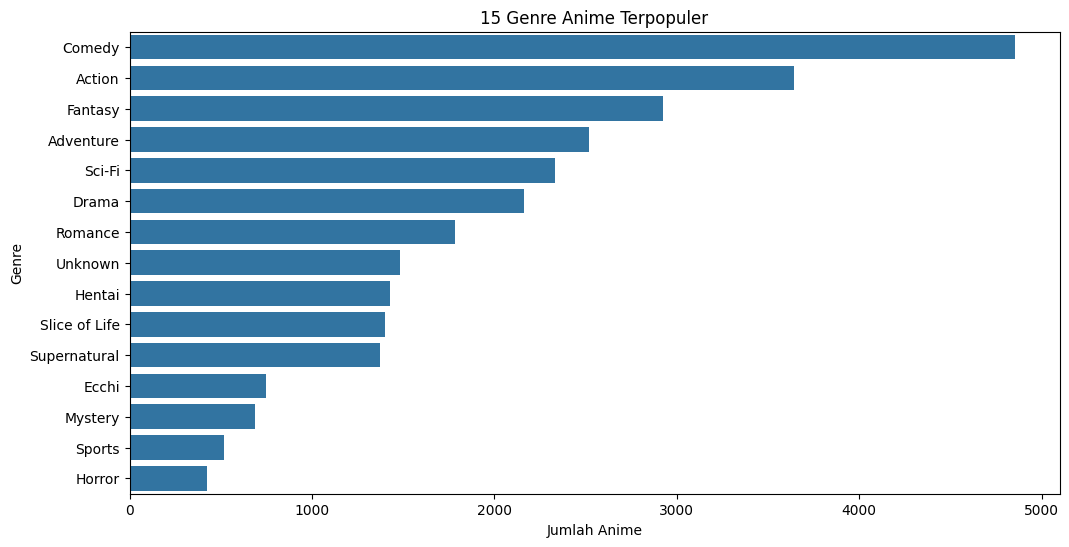

In [73]:
from collections import Counter

# Pisahkan genre yang dipisahkan koma
genre_lists = df_clean['Genres'].dropna().apply(lambda x: x.split(', '))
flat_genres = [genre for sublist in genre_lists for genre in sublist]

# Hitung frekuensi
genre_counts = Counter(flat_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values("Count", ascending=False)

# Visualisasi genre terpopuler
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df.head(15), x="Count", y="Genre")
plt.title("15 Genre Anime Terpopuler")
plt.xlabel("Jumlah Anime")
plt.ylabel("Genre")
plt.show()

# Referensi


[1] Kumar, V., Pathak, M., & Choudhury, T. (2020). *A Comparative Study of Recommender Systems in E-commerce*. International Journal of Advanced Computer Science and Applications, 11(2), 517–523. doi:10.14569/IJACSA.2020.0110265

[2] Ismail, M., Siregar, M. R., & Pinem, S. A. (2021). *Anime Recommendation System Based on Genre and Popularity Using Content-Based Filtering*. Journal of Computer Science and Engineering, 25(1), 34–42.